In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.style.use('seaborn-colorblind')

In [23]:
## Read in Excel files of data and question labels
XLS = pd.ExcelFile('../../ComputationSurveyData/LabeledComputationDataColumnRenamed.xlsx')
XLS2 = pd.ExcelFile('../../ComputationSurveyData/Questions.xlsx')

## Parse the appropriate sheets into dataframes
df = XLS.parse('LabeledComputationData')
questions = XLS2.parse('Sheet1')

outDir = "/Users/caballero/Desktop/CompSurveyFigs/"

## How many respondents are teaching computing?

Just a look at the raw number of people teaching computing

Number of total respondents:  1246
Number of those teaching computing:  751


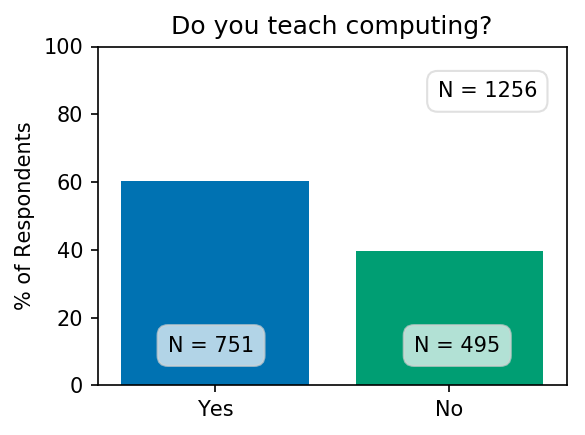

In [28]:
## Apply lambda to count number of yeses
isY = lambda x:int(x==1) ## Relabeled yes as 1 and no as 0
countComputing = lambda row: isY(row.Q1)

numberTeachingComp = df.apply(countComputing,axis=1).sum()
numberRespondents = df.shape[0]
print('Number of total respondents: ', numberRespondents)
print('Number of those teaching computing: ', numberTeachingComp)

teachComp = numberTeachingComp/numberRespondents*100

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

plt.bar([0],[teachComp])
plt.bar([1],[100-teachComp])
plt.ylabel('% of Respondents')
plt.xticks([0,1],['Yes','No'])
plt.axis([-.5,1.5,0,100])
plt.title('Do you teach computing?')

bboxprops = {'facecolor':'white', 'pad':0.5, 'boxstyle':'round', 'edgecolor':'lightgrey', 'alpha':0.7}

ax1.text(0.95, 85, 'N = 1256', bbox = bboxprops)
Ystring = 'N = '+  str(numberTeachingComp)
ax1.text(-0.20, 10, Ystring, bbox=bboxprops)
Nstring = 'N = '+  str(numberRespondents-numberTeachingComp)
ax1.text(0.85, 10, Nstring, bbox=bboxprops)
plt.tight_layout()
plt.savefig(outDir + 'TotalComp.pdf')

### Does this answer look different for different categories of institution?

It appears that 60% of respondents say they teach computing, but when broken down by type of institution do we see something different?

In [25]:
## group by for Q1 with "count()" will give the number of respondents broken down by each of the group by factors
byDegree = df.groupby(['Phy.Degfact','Q1']).count()
print(byDegree)

                 id   Q2   Q3   Q4   Q5   Q6  Q7   Q8   Q9  Q10  \
Phy.Degfact Q1                                                    
Associates  0   103  103  103  103  103  103   0  103  103  103   
            1    77   77   77   77   77   77   7   77   77   77   
Bachelors   0   151  151  151  151  151  151   1  151  151  151   
            1   380  380  380  380  380  380  70  380  380  380   
Masters     0    36   36   36   36   36   36   0   36   36   36   
            1    63   63   63   63   63   63  11   63   63   63   
Phd         0   205  205  205  205  205  205   1  205  205  205   
            1   231  231  231  231  231  231  31  231  231  231   

                    ...        Q178  Q179  Q180  NAME  CITY  STABBR  \
Phy.Degfact Q1      ...                                               
Associates  0       ...         103     5    23   103   103     103   
            1       ...          77     1    13    77    77      77   
Bachelors   0       ...         151     4    

Number of those teaching computing in  Associates :  103
Number of total respondents for  Associates :  180
Number of those teaching computing in  Bachelors :  151
Number of total respondents for  Bachelors :  531
Number of those teaching computing in  Masters :  36
Number of total respondents for  Masters :  99
Number of those teaching computing in  Doctoral :  205
Number of total respondents for  Doctoral :  436


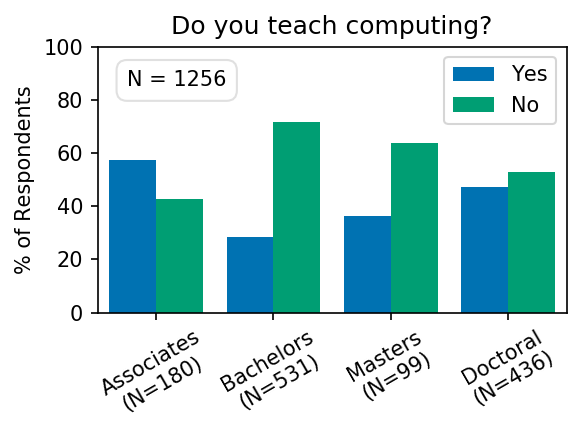

In [26]:
institutionType = ['Associates','Bachelors','Masters','Doctoral']
teachCompByDegree = []
notTeachCompByDegree = []

## Find the fraction of each respondents by type of institution
k=0
for i in range(0,8,2):

    numberTeachingComputing = byDegree['id'][i]
    totalRespondents = byDegree['id'][i]+byDegree['id'][i+1]
    
    fractionTeachingComputing = numberTeachingComputing/totalRespondents*100
    fractionNotTeachingComputing = 100 - fractionTeachingComputing
    
    teachCompByDegree.append(fractionTeachingComputing)
    notTeachCompByDegree.append(fractionNotTeachingComputing)
    
    print('Number of those teaching computing in ', institutionType[k], ': ', numberTeachingComputing)
    print('Number of total respondents for ', institutionType[k], ': ', totalRespondents)
    
    k=k+1

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

plt.bar(np.arange(0.1,8,2),teachCompByDegree)
plt.bar(np.arange(0.9,8,2),notTeachCompByDegree)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0.5,8,2),
           ['Associates\n(N=180)','Bachelors\n(N=531)','Masters\n(N=99)','Doctoral\n(N=436)'],
           rotation=30)
plt.axis([-.5,7.5,0,100])
plt.title('Do you teach computing?')
plt.legend(['Yes','No'])

ax2.text(0, 85, 'N = 1256', bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'TotalCompByDegree.pdf')

In [79]:
from scipy.stats import chi2_contingency
obs = [[103,151,36,205],[180-103,531-151,99-36,436-205]]
g, p, dof, expctd = chi2_contingency(obs)

print(dof)
if p < 0.05:
    print('There is an association between the variables (Xsq: ', str(g), ', p: ', str(p), ')')
else:
    print('There is NO association between the variables (Xsq: ', str(g), ', and p: ', str(p), ')')
## Implement pairwise testing

## Associates is an outlier, compare BS, MS, and PhD
obs = [[151,36,205],[531-151,99-36,436-205]]
g, p, dof, expctd = chi2_contingency(obs)
print(dof)
if p < 0.05/4:
    print('There is an association between the variables (Xsq: ', str(g), ', p: ', str(p), ')')
else:
    print('There is NO association between the variables (Xsq: ', str(g), ', and p: ', str(p), ')')
    
## Associates and PhD as outliers; compare BS, MS
obs = [[151,36],[531-151,99-36]]
g, p, dof, expctd = chi2_contingency(obs)
print(dof)
if p < 0.05/4:
    print('There is an association between the variables (Xsq: ', str(g), ', p: ', str(p), ')')
else:
    print('There is NO association between the variables (Xsq: ', str(g), ', and p: ', str(p), ')')
    
## Associates and BS as outliers; compare MS, PhD
obs = [[36,205],[99-36,436-205]]
g, p, dof, expctd = chi2_contingency(obs)
print(dof)
if p < 0.05/4:
    print('There is an association between the variables (Xsq: ', str(g), ', p: ', str(p), ')')
else:
    print('There is NO association between the variables (Xsq: ', str(g), ', and p: ', str(p), ')')
    
## Associates and MS as outliers; compare BS, PhD
obs = [[151,205],[531-151,436-205]]
g, p, dof, expctd = chi2_contingency(obs)
print(dof)
if p < 0.05/4:
    print('There is an association between the variables (Xsq: ', str(g), ', p: ', str(p), ')')
else:
    print('There is NO association between the variables (Xsq: ', str(g), ', and p: ', str(p), ')')

3
There is an association between the variables (Xsq:  61.424378391 , p:  2.91663080023e-13 )
2
There is an association between the variables (Xsq:  35.5613016742 , p:  1.8965375979e-08 )
1
There is NO association between the variables (Xsq:  2.14653541381 , and p:  0.142892016464 )
1
There is NO association between the variables (Xsq:  3.28204372498 , and p:  0.070041659355 )
1
There is an association between the variables (Xsq:  34.7422019173 , p:  3.76383317732e-09 )


## Are we overweighting multiple responses from the same institution?

I'm concerned because there can be multiple responses from the same school that we might really be overcounting in the departmental sense. So really we want some measure of that. One way to do so is to check if at least one person at a given school says they teach computing.

In [29]:
df['NAME'].nunique() ## total number of unique entries

357

In [30]:
countsBySchool = df.groupby(['NAME'])['Q1'].mean()

Number of Unique Schools:  357
Number of Schools with at least one computational teacher:  263


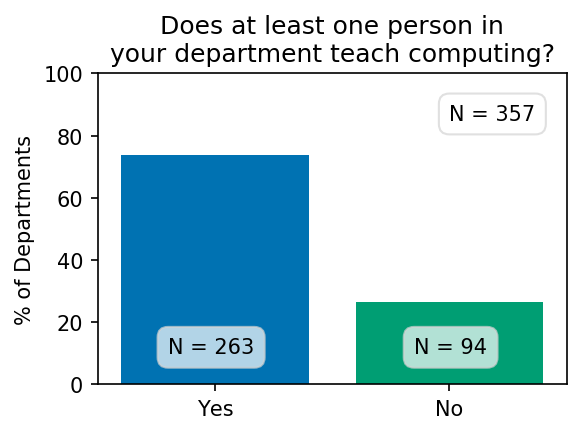

In [33]:
numberOfSchoolsWithOneTeacher = countsBySchool[countsBySchool > 0].shape[0]
numberOfUniqueSchools = df['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneTeacher)

atLeastOne = numberOfSchoolsWithOneTeacher/numberOfUniqueSchools*100

fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax3 = fig3.add_subplot(111)

plt.bar([0],[atLeastOne])
plt.bar([1],[100-atLeastOne])


plt.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.title('Does at least one person in\nyour department teach computing?')

ax3.text(1, 85, 'N = 357', bbox = bboxprops)

Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
ax3.text(0.85, 10, Nstring, bbox=bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'OnePerson.pdf')

## Does this look different for different kinds of schools?

I figured out the problem. I didn't have the right number of unqiue schools. In fact there are 357 of them NOT 504! I made some mistake in my original uniqueness algorithm. It turns out that there's an established method for counting the number of unique entries in a data frame (```nunique()```).

In [35]:
numberOfFacultyGrouped=df.groupby(['Phy.Degfact','NAME']).Q1.sum()
numberOfRespondentsGrouped=df.groupby(['Phy.Degfact','NAME']).Q1.size()
fractionOfFacultyGrouped = numberOfFacultyGrouped/numberOfRespondentsGrouped
fractionOfFacultyGrouped = fractionOfFacultyGrouped.reset_index()

In [36]:
iType = ['Associates','Bachelors','Masters','Phd']

numberWithAtLeastOneTeacher = []
numberUniqueSchools =[]
percentWithOneTeacher = []
percentWithOutOneTeacher = []

for i in iType:
    
    nUniqueSchools = fractionOfFacultyGrouped.loc[fractionOfFacultyGrouped['Phy.Degfact'] == i].Q1.size
    trueFalseCounts = fractionOfFacultyGrouped.loc[fractionOfFacultyGrouped['Phy.Degfact'] == i].Q1>0
    nWithAtLeastOneTeacher = trueFalseCounts.value_counts()[True]
    
    numberUniqueSchools.append(nUniqueSchools)
    numberWithAtLeastOneTeacher.append(nWithAtLeastOneTeacher)
    
    print('Number of ', i,' schools with at least one computing teacher: ', nWithAtLeastOneTeacher)
    print('Number of unique ', i,' schools: ', nUniqueSchools)
    
    pWithOneTeacher = nWithAtLeastOneTeacher/nUniqueSchools*100
    pWithOutOneTeacher = 100 - pWithOneTeacher
    
    percentWithOneTeacher.append(pWithOneTeacher)
    percentWithOutOneTeacher.append(pWithOutOneTeacher)

Number of  Associates  schools with at least one computing teacher:  64
Number of unique  Associates  schools:  139
Number of  Bachelors  schools with at least one computing teacher:  137
Number of unique  Bachelors  schools:  153
Number of  Masters  schools with at least one computing teacher:  18
Number of unique  Masters  schools:  18
Number of  Phd  schools with at least one computing teacher:  44
Number of unique  Phd  schools:  47


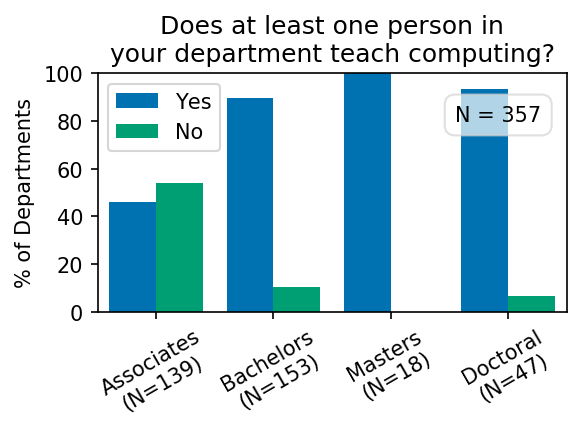

In [46]:
fig4 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax4 = fig4.add_subplot(111)

plt.bar(np.arange(0.1,8,2),percentWithOneTeacher)
plt.bar(np.arange(0.9,8,2),percentWithOutOneTeacher)

plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),
           ['Associates\n(N=139)','Bachelors\n(N=153)','Masters\n(N=18)','Doctoral\n(N=47)'],
           rotation=30)
plt.axis([-.5,7.5,0,100])
plt.title('Does at least one person in\nyour department teach computing?')
plt.legend(['Yes','No'])
ax4.text(5.6, 80, 'N = 357', bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'OnePersonByDegree.pdf')

## Does this look different for intro vs advanced courses?

It does. But also what this shows is that 66 people might have answered the first question in correctly as they selected NA for both of these questions. So the number of people answering this question is 685 instead of 751.

409 276 495 66


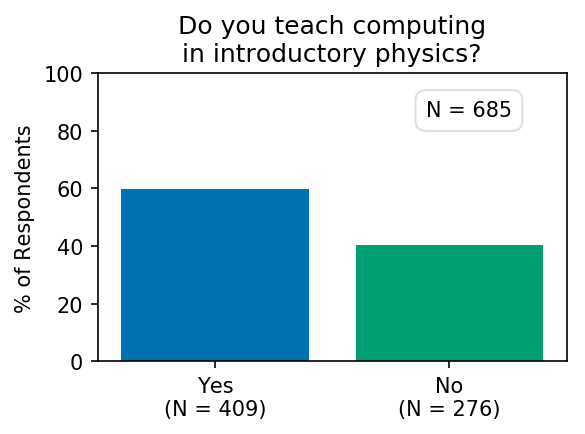

In [47]:
intYes = df.loc[df['Q8'] == 1].shape[0]
intNo = df.loc[df['Q8'] == 0].shape[0]
intSkip = df.loc[df['Q8'] == 99].shape[0]
intNA = df.loc[df['Q8'] == 999].shape[0]
intAll = df.loc[df['Q8'] >-1].shape[0]
print(intYes,intNo,intSkip,intNA)

intTot = intYes+intNo

percentInt = intYes/intTot*100

fig5 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax5 = fig5.add_subplot(111)

plt.bar([0],[percentInt])
plt.bar([1],[100-percentInt])
plt.ylabel('% of Respondents')

YesString = 'Yes\n(N = ' + str(intYes) + ')'
NoString = 'No\n(N = ' + str(intTot-intYes) + ')'
plt.xticks([0,1],[YesString,NoString])

plt.axis([-.5,1.5,0,100])
plt.title('Do you teach computing\nin introductory physics?')

Nstring = 'N = ' + str(intTot)

ax5.text(0.9, 85, Nstring, bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'TeachIntro.pdf')

536 149 495 66


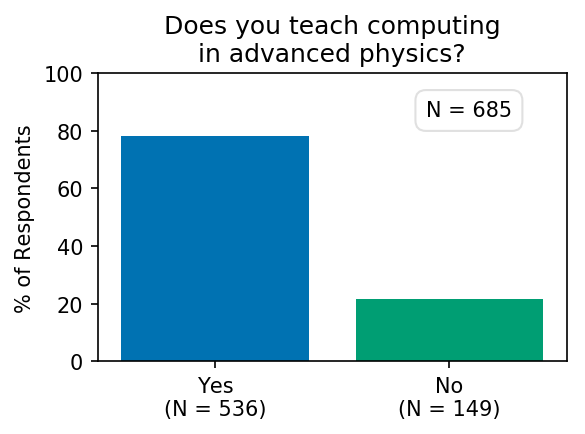

In [48]:
advYes = df.loc[df['Q11'] == 1].shape[0]
advNo = df.loc[df['Q11'] == 0].shape[0]
advSkip = df.loc[df['Q11'] == 99].shape[0]
advNA = df.loc[df['Q11'] == 999].shape[0]
advAll = df.loc[df['Q11'] >-1].shape[0]
print(advYes,advNo,advSkip,advNA)

advTot = advYes+advNo

percentAdv = advYes/advTot*100

fig6 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax6 = fig6.add_subplot(111)

plt.bar([0],[percentAdv])
plt.bar([1],[100-percentAdv])
plt.ylabel('% of Respondents')

YesString = 'Yes\n(N = ' + str(advYes) + ')'
NoString = 'No\n(N = ' + str(advTot-advYes) + ')'
plt.xticks([0,1],[YesString,NoString])

plt.axis([-.5,1.5,0,100])
plt.title('Does you teach computing\nin advanced physics?')

Nstring = 'N = ' + str(advTot)


ax6.text(0.9, 85, Nstring, bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'TeachAdvanced.pdf')

315 221 94 55 685
[45.98540145985402, 32.262773722627735, 13.72262773722628, 8.02919708029197]


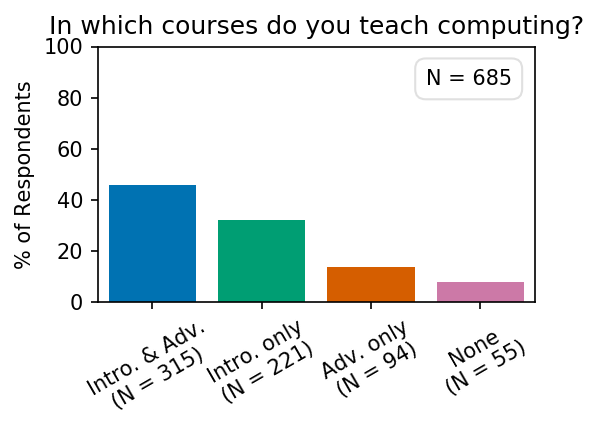

In [49]:
bothYes = df.loc[(df['Q8'] == 1) & (df['Q11'] == 1)].shape[0]
introYesAdvNo = df.loc[(df['Q8'] == 0) & (df['Q11'] == 1)].shape[0]
introNoAdvYes = df.loc[(df['Q8'] == 1) & (df['Q11'] == 0)].shape[0]
bothNo = df.loc[(df['Q8'] == 0) & (df['Q11'] == 0)].shape[0]

allResponses = bothYes+introYesAdvNo+introNoAdvYes+bothNo

print(bothYes,introYesAdvNo,introNoAdvYes,bothNo,allResponses)

percents = [x/allResponses*100 for x in [bothYes,introYesAdvNo,introNoAdvYes,bothNo]]
print(percents)
fig6a = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax6a = fig6a.add_subplot(111)

i=0
for p in percents:
    plt.bar(i,p)
    i+=1

plt.ylabel('% of Respondents')

labels = ['Intro. & Adv.\n(N = ' + str(bothYes) + ')',
          'Intro. only\n(N = '+str(introYesAdvNo)+')',
          'Adv. only\n(N = '+str(introNoAdvYes)+')',
          'None\n(N = '+str(bothNo)+')']
plt.xticks([0,1,2,3],labels,rotation=30)

plt.axis([-.5,3.5,0,100])
plt.title('In which courses do you teach computing?')

Nstring = 'N = ' + str(allResponses)


ax6a.text(2.5, 85, Nstring, bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'WhichCourses.pdf')

Again, we might have a counting problem, so we do this by department.

Total number of unique schools:  357
Number of schools with at least one intro teacher:  191


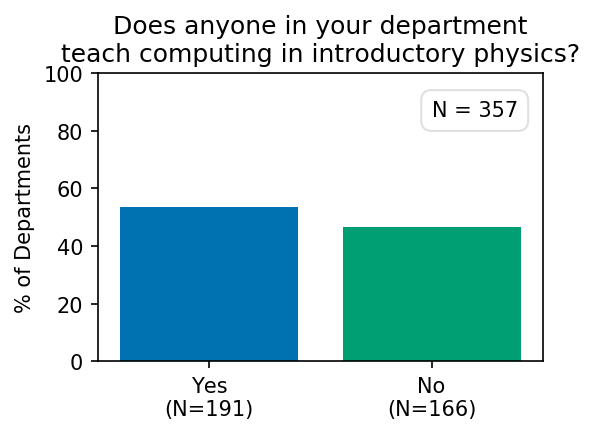

In [50]:
count0 = 0
count1 = 0

countedSchools = []

for index, row in df.iterrows():
    
    if(row['Q8']==1):
        count1 += 1
        countedSchools.append(row['NAME'])
    if(row['Q8'] == 0):
        count0 += 1

introSchools = len(set(countedSchools))
totalSchools = len(set(df['NAME']))

print('Total number of unique schools: ', totalSchools)
print('Number of schools with at least one intro teacher: ', introSchools)

percentIntroSchools = introSchools/totalSchools*100
                   
fig7 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax7 = fig7.add_subplot(111)

plt.bar([0],[percentIntroSchools])
plt.bar([1],[100-percentIntroSchools])

plt.ylabel('% of Departments')

YesString = 'Yes\n(N=' + str(introSchools) + ')'
NoString = 'No\n(N=' + str(totalSchools-introSchools) + ')'
plt.xticks([0,1],[YesString,NoString])

plt.axis([-.5,1.5,0,100])
plt.title('Does anyone in your department\nteach computing in introductory physics?')
ax7.text(1, 85, 'N = 357', bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'OneTeachIntroByDepartment.pdf')

Total number of unique schools:  357
Number of schools with at least one advanced teacher:  184


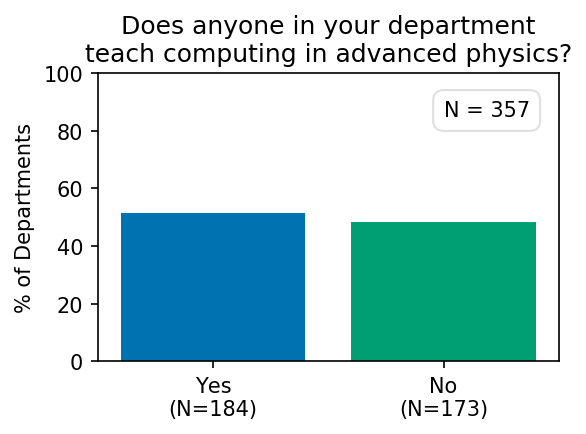

In [51]:
count0 = 0
count1 = 0

countedSchools = []

for index, row in df.iterrows():
    
    if(row['Q11']==1):
        count1 += 1
        countedSchools.append(row['NAME'])
    if(row['Q11'] == 0):
        count0 += 1

advSchools = len(set(countedSchools))
totalSchools = len(set(df['NAME']))

print('Total number of unique schools: ', totalSchools)
print('Number of schools with at least one advanced teacher: ', advSchools)

percentAdvSchools = advSchools/totalSchools*100
                   
fig8 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax8 = fig8.add_subplot(111)

plt.bar([0],[percentAdvSchools])
plt.bar([1],[100-percentAdvSchools])

plt.ylabel('% of Departments')

YesString = 'Yes\n(N=' + str(advSchools) + ')'
NoString = 'No\n(N=' + str(totalSchools-advSchools) + ')'
plt.xticks([0,1],[YesString,NoString])

plt.axis([-.5,1.5,0,100])
plt.title('Does anyone in your department\nteach computing in advanced physics?')

ax8.text(1, 85, 'N = 357', bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'OneTeachAdvancedByDepartment.pdf')

In [172]:
countBoth = 0
countIntroYes = 0
countAdvYes = 0
countNo = 0

countedBothSchools = []
countedIntroSchools = []
countedAdvSchools = []
countedNoSchools = []

for index, row in df.iterrows():
    
    if((row['Q8']==1) & (row['Q11']==1)):
        countBoth += 1
        countedBothSchools.append(row['NAME'])
    if((row['Q8']==1) & (row['Q11']==0)):
        countIntroYes += 1
        countedIntroSchools.append(row['NAME'])
    if((row['Q8']==0) & (row['Q11']==1)):
        countAdvYes += 1
        countedAdvSchools.append(row['NAME'])
    if((row['Q8']==0) & (row['Q11']==0)):
        countNo += 1
        countedNoSchools.append(row['NAME'])

BothSchools = len(set(countedBothSchools))
IntroSchools = len(set(countedIntroSchools))
AdvSchools = len(set(countedAdvSchools))
NoSchools = len(set(countedNoSchools))
        
# advSchools = len(set(countedSchools))
totalSchools = BothSchools + IntroSchools + AdvSchools + NoSchools
print(totalSchools)
# print('Total number of unique schools: ', totalSchools)
# print('Number of schools with at least one advanced teacher: ', advSchools)

# percentAdvSchools = advSchools/totalSchools*100
                   
# fig8 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
# ax8 = fig8.add_subplot(111)

# plt.bar([0],[percentAdvSchools])
# plt.bar([1],[100-percentAdvSchools])

# plt.ylabel('% of Departments')

# YesString = 'Yes\n(N=' + str(advSchools) + ')'
# NoString = 'No\n(N=' + str(totalSchools-advSchools) + ')'
# plt.xticks([0,1],[YesString,NoString])

# plt.axis([-.5,1.5,0,100])
# plt.title('Does anyone in your department\nteach computing in advanced physics?')

# ax8.text(1, 85, 'N = 357',
#         bbox={'facecolor':'white', 'pad':0.5, 'boxstyle':'round', 'edgecolor':'lightgrey', 'alpha':0.7})

396


In [52]:
def countUniqueDepartmentResponse(df,question,level):
    
    count0 = 0
    count1 = 0
    counted = []

    for index, row in df.iterrows():
    
        if(row[question] == 1 and row['Phy.Degfact'] == level):
            count1 += 1
            counted.append(row['NAME'])
        if(row[question] == 0 and row['Phy.Degfact'] == level):
            count0 += 1

    uniqueYes = len(set(counted))
    total = df['NAME'].groupby(df['Phy.Degfact']==level).unique()[1].size
    print('Total number of ', level, ' departments: ', total)
    print('Number of ', level, 'departments who do the thing requested: ', uniqueYes)
    
    percentYes = uniqueYes/total*100
    percentNo = 100-percentYes
    
    return percentYes,percentNo

Total number of  Associates  departments:  139
Number of  Associates departments who do the thing requested:  42
Total number of  Bachelors  departments:  153
Number of  Bachelors departments who do the thing requested:  101
Total number of  Masters  departments:  18
Number of  Masters departments who do the thing requested:  13
Total number of  Phd  departments:  47
Number of  Phd departments who do the thing requested:  35


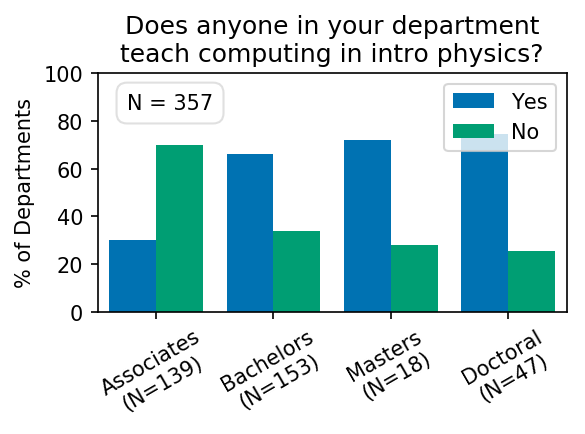

In [54]:
questionNo='Q8'
percentYes1,percentNo1 = countUniqueDepartmentResponse(df,questionNo,'Associates')
percentYes2,percentNo2 = countUniqueDepartmentResponse(df,questionNo,'Bachelors')
percentYes3,percentNo3 = countUniqueDepartmentResponse(df,questionNo,'Masters')
percentYes4,percentNo4 = countUniqueDepartmentResponse(df,questionNo,'Phd')
            
teachIntro = [percentYes1,percentYes2,percentYes3,percentYes4]
dontTeachIntro = [percentNo1,percentNo2,percentNo3,percentNo4]

fig9 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax9 = fig9.add_subplot(111)

plt.bar(np.arange(0.1,8,2),teachIntro)
plt.bar(np.arange(0.9,8,2),dontTeachIntro)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),
           ['Associates\n(N=139)','Bachelors\n(N=153)','Masters\n(N=18)','Doctoral\n(N=47)'],
           rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.title('Does anyone in your department\nteach computing in intro physics?')

ax9.text(0, 85, 'N = 357', bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'OneTeachIntroByDepartmentByDegree.pdf')

Total number of  Associates  departments:  139
Number of  Associates departments who do the thing requested:  3
Total number of  Bachelors  departments:  153
Number of  Bachelors departments who do the thing requested:  120
Total number of  Masters  departments:  18
Number of  Masters departments who do the thing requested:  17
Total number of  Phd  departments:  47
Number of  Phd departments who do the thing requested:  44


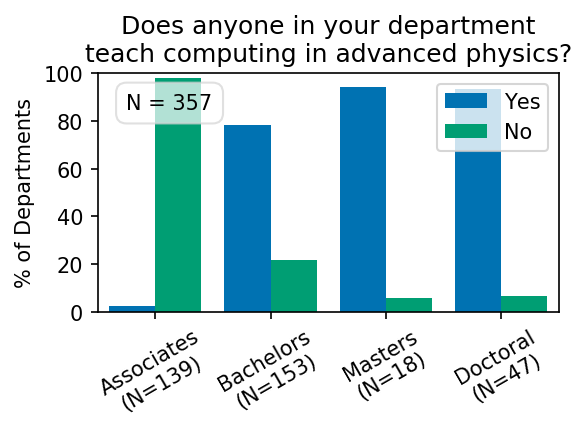

In [55]:
questionNo='Q11'
percentYes1,percentNo1 = countUniqueDepartmentResponse(df,questionNo,'Associates')
percentYes2,percentNo2 = countUniqueDepartmentResponse(df,questionNo,'Bachelors')
percentYes3,percentNo3 = countUniqueDepartmentResponse(df,questionNo,'Masters')
percentYes4,percentNo4 = countUniqueDepartmentResponse(df,questionNo,'Phd')
            
teachAdv = [percentYes1,percentYes2,percentYes3,percentYes4]
dontTeachAdv = [percentNo1,percentNo2,percentNo3,percentNo4]

fig10 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax10 = fig10.add_subplot(111)

plt.bar(np.arange(0.1,8,2),teachAdv)
plt.bar(np.arange(0.9,8,2),dontTeachAdv)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),
           ['Associates\n(N=139)','Bachelors\n(N=153)','Masters\n(N=18)','Doctoral\n(N=47)'],
           rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.title('Does anyone in your department\nteach computing in advanced physics?')

ax10.text(0, 85, 'N = 357', bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'OneTeachAdvancedByDepartmentByDegree.pdf')

Total number of  Associates  departments:  139
Number of  Associates departments who do the thing requested:  30
Total number of  Bachelors  departments:  153
Number of  Bachelors departments who do the thing requested:  100
Total number of  Masters  departments:  18
Number of  Masters departments who do the thing requested:  12
Total number of  Phd  departments:  47
Number of  Phd departments who do the thing requested:  40


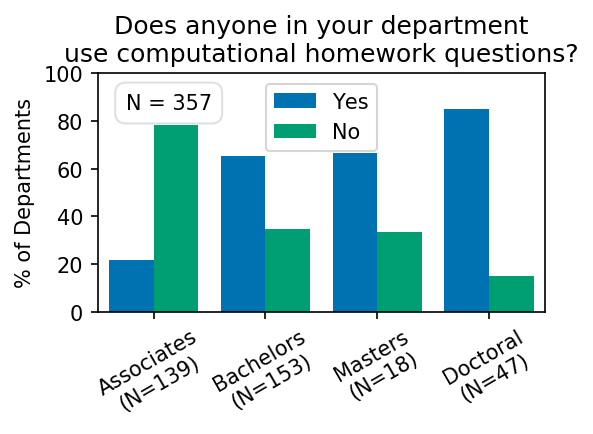

In [56]:
questionNo='Q32'
percentYes1,percentNo1 = countUniqueDepartmentResponse(df,questionNo,'Associates')
percentYes2,percentNo2 = countUniqueDepartmentResponse(df,questionNo,'Bachelors')
percentYes3,percentNo3 = countUniqueDepartmentResponse(df,questionNo,'Masters')
percentYes4,percentNo4 = countUniqueDepartmentResponse(df,questionNo,'Phd')
            
teachIntro = [percentYes1,percentYes2,percentYes3,percentYes4]
dontTeachIntro = [percentNo1,percentNo2,percentNo3,percentNo4]

fig11 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax11 = fig11.add_subplot(111)

plt.bar(np.arange(0.1,8,2),teachIntro)
plt.bar(np.arange(0.9,8,2),dontTeachIntro)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),
           ['Associates\n(N=139)','Bachelors\n(N=153)','Masters\n(N=18)','Doctoral\n(N=47)'],
           rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.title('Does anyone in your department\nuse computational homework questions?')
ax11.text(0, 85, 'N = 357', bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'OneHWByDepartmentByDegree.pdf')

Total number of  Associates  departments:  139
Number of  Associates departments who do the thing requested:  24
Total number of  Bachelors  departments:  153
Number of  Bachelors departments who do the thing requested:  47
Total number of  Masters  departments:  18
Number of  Masters departments who do the thing requested:  5
Total number of  Phd  departments:  47
Number of  Phd departments who do the thing requested:  28


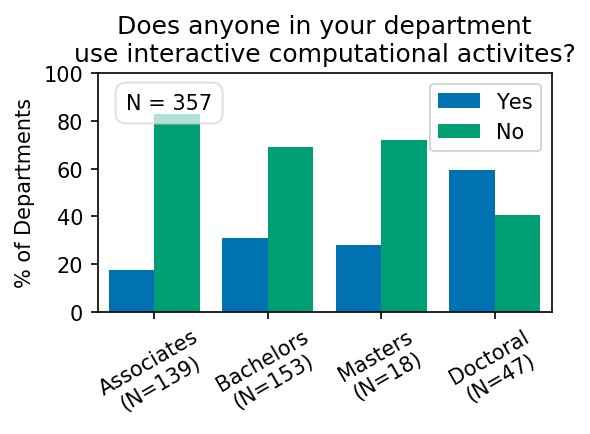

In [57]:
questionNo='Q33'
percentYes1,percentNo1 = countUniqueDepartmentResponse(df,questionNo,'Associates')
percentYes2,percentNo2 = countUniqueDepartmentResponse(df,questionNo,'Bachelors')
percentYes3,percentNo3 = countUniqueDepartmentResponse(df,questionNo,'Masters')
percentYes4,percentNo4 = countUniqueDepartmentResponse(df,questionNo,'Phd')
            
teachIntro = [percentYes1,percentYes2,percentYes3,percentYes4]
dontTeachIntro = [percentNo1,percentNo2,percentNo3,percentNo4]

fig12 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax12 = fig12.add_subplot(111)

plt.bar(np.arange(0.1,8,2),teachIntro)
plt.bar(np.arange(0.9,8,2),dontTeachIntro)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),
           ['Associates\n(N=139)','Bachelors\n(N=153)','Masters\n(N=18)','Doctoral\n(N=47)'],
           rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.title('Does anyone in your department\nuse interactive computational activites?')
ax12.text(0, 85, 'N = 357', bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'OneInteractiveByDepartmentByDegree.pdf')

Total number of  Associates  departments:  139
Number of  Associates departments who do the thing requested:  17
Total number of  Bachelors  departments:  153
Number of  Bachelors departments who do the thing requested:  56
Total number of  Masters  departments:  18
Number of  Masters departments who do the thing requested:  6
Total number of  Phd  departments:  47
Number of  Phd departments who do the thing requested:  17


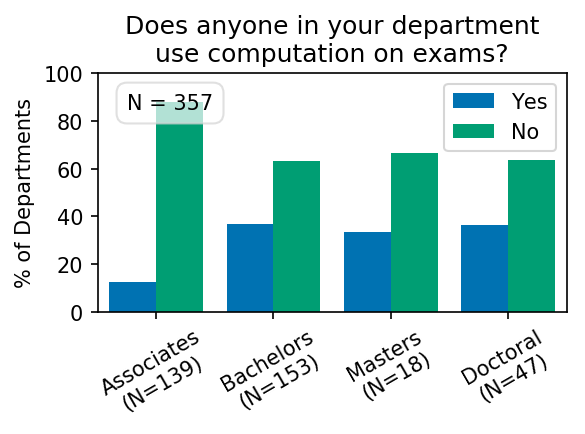

In [58]:
questionNo='Q34'
percentYes1,percentNo1 = countUniqueDepartmentResponse(df,questionNo,'Associates')
percentYes2,percentNo2 = countUniqueDepartmentResponse(df,questionNo,'Bachelors')
percentYes3,percentNo3 = countUniqueDepartmentResponse(df,questionNo,'Masters')
percentYes4,percentNo4 = countUniqueDepartmentResponse(df,questionNo,'Phd')
            
teachIntro = [percentYes1,percentYes2,percentYes3,percentYes4]
dontTeachIntro = [percentNo1,percentNo2,percentNo3,percentNo4]

fig13 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax13 = fig13.add_subplot(111)

plt.bar(np.arange(0.1,8,2),teachIntro)
plt.bar(np.arange(0.9,8,2),dontTeachIntro)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),
           ['Associates\n(N=139)','Bachelors\n(N=153)','Masters\n(N=18)','Doctoral\n(N=47)'],
           rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.title('Does anyone in your department\nuse computation on exams?')
ax13.text(0, 85, 'N = 357', bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'OneExamsByDepartmentByDegree.pdf')

Total number of  Associates  departments:  139
Number of  Associates departments who do the thing requested:  36
Total number of  Bachelors  departments:  153
Number of  Bachelors departments who do the thing requested:  101
Total number of  Masters  departments:  18
Number of  Masters departments who do the thing requested:  14
Total number of  Phd  departments:  47
Number of  Phd departments who do the thing requested:  39


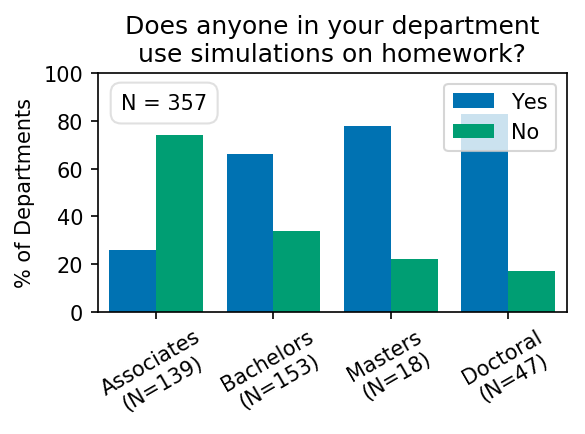

In [64]:
questionNo='Q35'
percentYes1,percentNo1 = countUniqueDepartmentResponse(df,questionNo,'Associates')
percentYes2,percentNo2 = countUniqueDepartmentResponse(df,questionNo,'Bachelors')
percentYes3,percentNo3 = countUniqueDepartmentResponse(df,questionNo,'Masters')
percentYes4,percentNo4 = countUniqueDepartmentResponse(df,questionNo,'Phd')
            
teachIntro = [percentYes1,percentYes2,percentYes3,percentYes4]
dontTeachIntro = [percentNo1,percentNo2,percentNo3,percentNo4]

fig14 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax14 = fig14.add_subplot(111)

plt.bar(np.arange(0.1,8,2),teachIntro)
plt.bar(np.arange(0.9,8,2),dontTeachIntro)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),
           ['Associates\n(N=139)','Bachelors\n(N=153)','Masters\n(N=18)','Doctoral\n(N=47)'],
           rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.title('Does anyone in your department\nuse simulations on homework?')
ax14.text(-0.1, 85, 'N = 357', bbox = bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'OneSimHWByDepartmentByDegree.pdf')

In [ ]:
#